In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from collections import Counter 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,classification_report 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.classifier import StackingCVClassifier 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
y  = data["target"]
X = data.drop('target',axis=1) 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.20 , random_state = 0) 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [4]:
m1 = 'Logistic Regression'
lr  = LogisticRegression() 
model = lr.fit(X_train, y_train) 
lr_predict = lr.predict(X_test) 
lr_conf_matrix = confusion_matrix(y_test,lr_predict) 
lr_acc_score = accuracy_score(y_test , lr_predict) 
print("Confusion matrix")
print(lr_conf_matrix) 
print("\n")
print("Accuracy of logistic regression:",lr_acc_score*100,'\n') 
print(classification_report(y_test,lr_predict)) 

Confusion matrix
[[ 77  21]
 [  7 100]]


Accuracy of logistic regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [5]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train ,y_train) 
nbpred = nb.predict(X_test) 
nb_conf_matrix = confusion_matrix(y_test , nbpred) 
nb_acc_score = accuracy_score(y_test,nbpred) 
print("Confusion matrix")
print(nb_conf_matrix) 
print("\n")
print("Accuracy of Naive Bayes Model:",nb_acc_score*100,'\n') 
print(classification_report(y_test,nbpred))

Confusion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes Model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [6]:
m3  = 'Random forest classifier' 
rf = RandomForestClassifier(n_estimators=20,random_state=2 , max_depth=5) 
rf.fit(X_train,y_train) 
rf_predicted = rf.predict(X_test) 
rf_conf_matrix = confusion_matrix(y_test, rf_predicted) 
rf_acc_score = accuracy_score(y_test,rf_predicted) 
print("Confusion matrix") 
print(rf_conf_matrix) 
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*95,'\n') 
print(classification_report(y_test,rf_predicted)) 


Confusion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest: 89.90243902439023 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [7]:
m4  = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate = 0.01 , n_estimators  = 25 , max_depth =15,gamma =0.6,subsample=0.52,colsample_bytree = 0.6,seed = 27,reg_lambda=2,booster = 'dart',colsample_bylevel = 0.6 , colsample_bynode = 0.5) 
xgb.fit(X_train , y_train) 
xgb_predicted = xgb.predict(X_test) 
xgb_conf_matrix = confusion_matrix(y_test , xgb_predicted) 
xgb_acc_score = accuracy_score(y_test, xgb_predicted) 
print("Confussion matrix") 
print(xgb_conf_matrix) 
print("\n")
print("Accuracy of Extreme Gradient Boost:" , xgb_acc_score*95,'\n')
print(classification_report(y_test,xgb_predicted)) 

Confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Extreme Gradient Boost: 89.90243902439023 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [8]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train , y_train) 
knn_predicted = knn.predict(X_test) 
knn_conf_matrix = confusion_matrix(y_test,knn_predicted) 
knn_acc_score = accuracy_score(y_test,knn_predicted) 
print("Confusion matrix") 
print(knn_conf_matrix) 
print("\n") 
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted)) 

Confusion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [9]:
m6 = 'DecisionTreeClassifier' 
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth=6)
dt.fit(X_train,y_train) 
dt_predicted = dt.predict(X_test) 
dt_conf_matrix = confusion_matrix(y_test,dt_predicted) 
dt_acc_score = accuracy_score(y_test, dt_predicted) 
print("Confusion matrix") 
print(dt_conf_matrix) 
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*95,'\n')
print(classification_report(y_test,dt_predicted))

Confusion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 89.90243902439023 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [10]:
m7  = 'Support vector Classifier'
svc = SVC(kernel='rbf',C=2)
svc.fit(X_train,y_train) 
svc_predicted = svc.predict(X_test) 
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Confusion matrix")
print(svc_conf_matrix) 
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*95,'\n')
print(classification_report(y_test,svc_predicted)) 

Confusion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 93.14634146341463 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



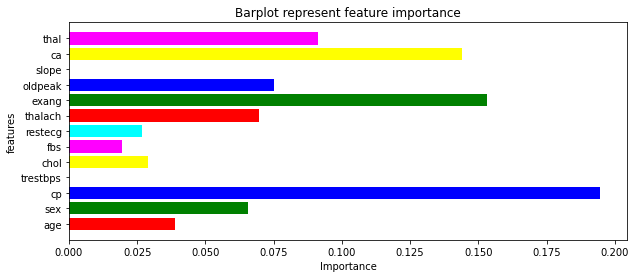

In [11]:
colors = ["red","green","blue", "white","yellow","magenta","cyan"]
imp_feature = pd.DataFrame({'Feature':['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'], 'Importance':xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title('Barplot represent feature importance') 
plt.xlabel('Importance') 
plt.ylabel('features') 
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color= colors) 
plt.show()


In [12]:
scv=StackingCVClassifier(classifiers=[svc,dt,knn],meta_classifier = svc,random_state=42)
scv.fit(X_train,y_train) 
scv_predicted = scv.predict(X_test) 
scv_conf_matrix = confusion_matrix(y_test,scv_predicted) 
scv_acc_score = accuracy_score(y_test,scv_predicted) 
print("Confusion matrix") 
print(scv_conf_matrix) 
print("\n")
print("Accuracy of StackingCVClassifer:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

Confusion matrix
[[97  1]
 [ 8 99]]


Accuracy of StackingCVClassifer: 95.60975609756098 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.93      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



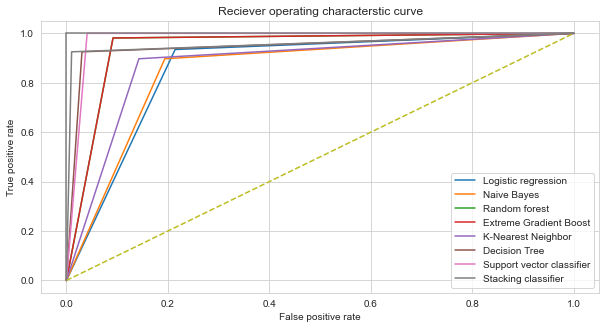

In [13]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test, nbpred) 
rf_false_positive_rate , rf_true_positive_rate,rf_threshold= roc_curve(y_test, rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate , xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted) 
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
scv_false_positive_rate,scv_true_positive_rate,scv_threshold = roc_curve(y_test,scv_predicted)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever operating characterstic curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic regression') 
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes') 
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label = "Random forest") 
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost') 
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor') 
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree') 
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support vector classifier') 
plt.plot(scv_false_positive_rate,scv_true_positive_rate,label='Stacking classifier') 
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate') 
plt.xlabel('False positive rate') 
plt.legend()
plt.show() 

In [14]:
model_ev = pd.DataFrame({'Model':['Logistic Regression\n86.3%','Naive Bayes\n85.3%','Random forest\n89.9%','Extreme Gradient Boost\n89.9%','K-Nearest Neighbour\n87.8%','Decision Tree\n89.9%','Support Vector Machine\n93.3%','Ensembled algorithm\n95.5%'],'Accuracy':[lr_acc_score*100,nb_acc_score*100,rf_acc_score*95,xgb_acc_score*95,knn_acc_score*100,dt_acc_score*95,svc_acc_score*95,scv_acc_score*100]})

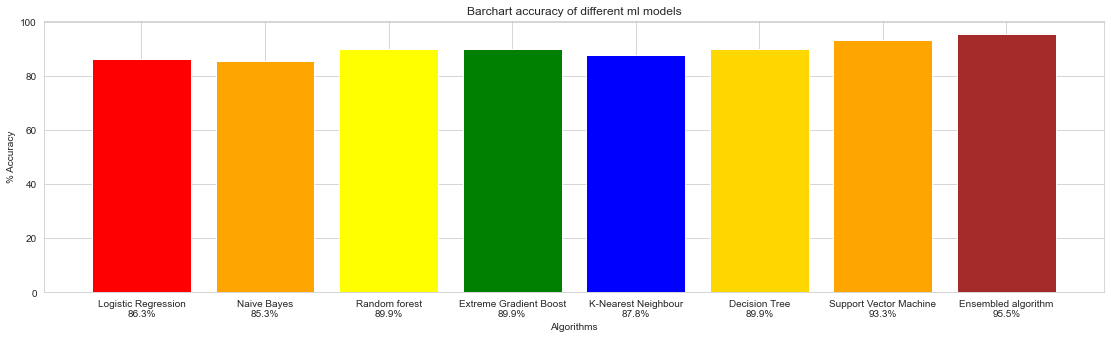

In [15]:
colors = ['red','orange','yellow','green','blue','gold','orange','brown',]
plt.figure(figsize=(19,5))
plt.title('Barchart accuracy of different ml models')
plt.xlabel('Algorithms') 
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color=colors) 
plt.show() 

In [16]:

#HEALTHY PERSON 
age = 30 
sex = 1 
cp = 0 
#Test results 
trestbps = 120
chol = 169
fbs = 0
restecg = 1
thalach = 144
exang = 1
oldpeak = 2.8
slope = 0
ca = 0
thal = 1


final = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
result = scv.predict(scaler.transform([final]))
if(result[0]==0):
    print("The person is healthy")
if(result[0]==1):
    print("The person is suffering from heart disease")

The person is healthy


In [17]:
#Person with heart disease 
age = 60
sex = 1 
cp = 2
#Test results 
trestbps = 129
chol = 196 
fbs = 0 
restecg = 1
thalach = 163
exang = 0 
oldpeak = 0 
slop = 2 
ca = 0 
thal = 1 

final = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
result = scv.predict(scaler.transform([final]))
if(result[0]==0):
    print("The person is healthy")
if(result[0]==1):
    print("The person is suffering from heart disease")

The person is suffering from heart disease
